In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [24]:
dir = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train/diff'
dir_1 = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train_1/diff'
df = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/full_datasets/train_1/ESM_BA1_100_predict_w_rank.csv')

In [23]:
dir = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train_1'
dir_r = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/predict/train_1/rankings'
out_path = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/full_datasets/train_1'
for file in os.listdir(dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir, file))
        df_r = pd.read_csv(os.path.join(dir_r, file))
        name = os.path.splitext(file)[0]
        type = name.split('_')[-1]
        if type == 'deltas':
            columns_to_merge = [
    'seq_id', 'rank_bind', 'rank_predicted_bind', 'rank_diff_bind',
    'rank_delta_bind', 'rank_predicted_delta_bind', 'rank_diff_delta_bind',
    'rank_expr', 'rank_predicted_expr', 'rank_diff_expr',
    'rank_delta_expr', 'rank_predicted_delta_expr', 'rank_diff_delta_expr'
]
        elif type == 'predict':
            columns_to_merge = ['seq_id', 'rank_bind', 'rank_predicted_bind', 'rank_diff_bind', 'rank_expr', 'rank_predicted_expr', 'rank_diff_expr']
        merged_df = pd.merge(df, df_r[columns_to_merge], on='seq_id', how='left')
        out_name = name + '_w_rank.csv'
        merged_df.to_csv(os.path.join(out_path, out_name), index=False)

In [30]:
dir = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/full/train'
out_dir = '/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train'
for file in os.listdir(dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir, file))
        name = os.path.splitext(file)[0]
        name_list = name.split('_')
        type = name.split('_')[4]
        if type == 'deltas':
            df_b = df[(df['difference_bind'] <= 1) & (df['difference_bind'] >= -1)]
            df_rb = df_b[(df_b['rank_diff_bind'] <= 25) & (df_b['rank_diff_bind'] >= -25)]
            df_db = df[(df['difference_delta_bind'] <= 1) & (df['difference_delta_bind'] >= -1)]
            df_rdb = df_db[(df_db['rank_diff_delta_bind'] <= 25) & (df_db['rank_diff_delta_bind'] >= -25)]
            df_e = df[(df['difference_expr'] <= 0.5) & (df['difference_expr'] >= -0.5)]
            df_re = df_e[(df_e['rank_diff_expr'] <= 25) & (df_e['rank_diff_expr'] >= -25)]
            df_de = df[(df['difference_delta_expr'] <= 0.5) & (df['difference_delta_expr'] >= -0.5)]
            df_rde = df_de[(df_de['rank_diff_delta_expr'] <= 25) & (df_de['rank_diff_delta_expr'] >= -25)]
            # df_c_1 = pd.merge(df_rb, df_rdb, on='seq_id', how='inner')
            # df_c_2 = pd.merge(df_re, df_rde, on='seq_id', how='inner')
            # df_c = pd.merge(df_c_1, df_c_2, on='seq_id', how='inner')
            out_name_rb = name_list[0] + '_' + name_list[1] + '_' + 'b_extr_d.csv'
            out_name_rdb = name_list[0] + '_' + name_list[1] + '_' + 'db_extr_d.csv'
            out_name_re = name_list[0] + '_' + name_list[1] + '_' + 'e_extr_d.csv'
            out_name_rde = name_list[0] + '_' + name_list[1] + '_' + 'de_extr_d.csv'
            df_rb.to_csv(os.path.join(out_dir, out_name_rb), index=False)
            df_rdb.to_csv(os.path.join(out_dir, out_name_rdb), index=False)
            df_re.to_csv(os.path.join(out_dir, out_name_re), index=False)
            df_rde.to_csv(os.path.join(out_dir, out_name_rde), index=False)
        else:
            df_b = df[(df['difference_bind'] <= 1) & (df['difference_bind'] >= -1)]
            df_rb = df_b[(df_b['rank_diff_bind'] <= 25) & (df_b['rank_diff_bind'] >= -25)]
            df_e = df[(df['difference_expr'] <= 0.5) & (df['difference_expr'] >= -0.5)]
            df_re = df_e[(df_e['rank_diff_expr'] <= 25) & (df_e['rank_diff_expr'] >= -25)]
            # df_c = pd.merge(df_rb, df_re, on='seq_id', how='inner')
            out_name_rb = name_list[0] + '_' + name_list[1] + '_' + 'b_extr.csv'
            out_name_re = name_list[0] + '_' + name_list[1] + '_' + 'e_extr.csv'
            df_rb.to_csv(os.path.join(out_dir, out_name_rb), index=False)
            df_re.to_csv(os.path.join(out_dir, out_name_re), index=False)
        


In [11]:
df1 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/ESM_BA1_b_extr.csv')
df2 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/ESM_BA2_b_extr.csv')
df3 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/AF_BA1_b_extr.csv')
df4 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/AF_BA2_b_extr.csv')

# df1 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/ESM_BA1_e_extr_d.csv')
# df2 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/ESM_BA2_e_extr_d.csv')
# df3 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/AF_BA1_e_extr_d.csv')
# df4 = pd.read_csv('/Users/maxvandenboom/stayahead/analysis/datasets/xgb/outputs/datasets/extracted/train_1/AF_BA2_e_extr_d.csv')

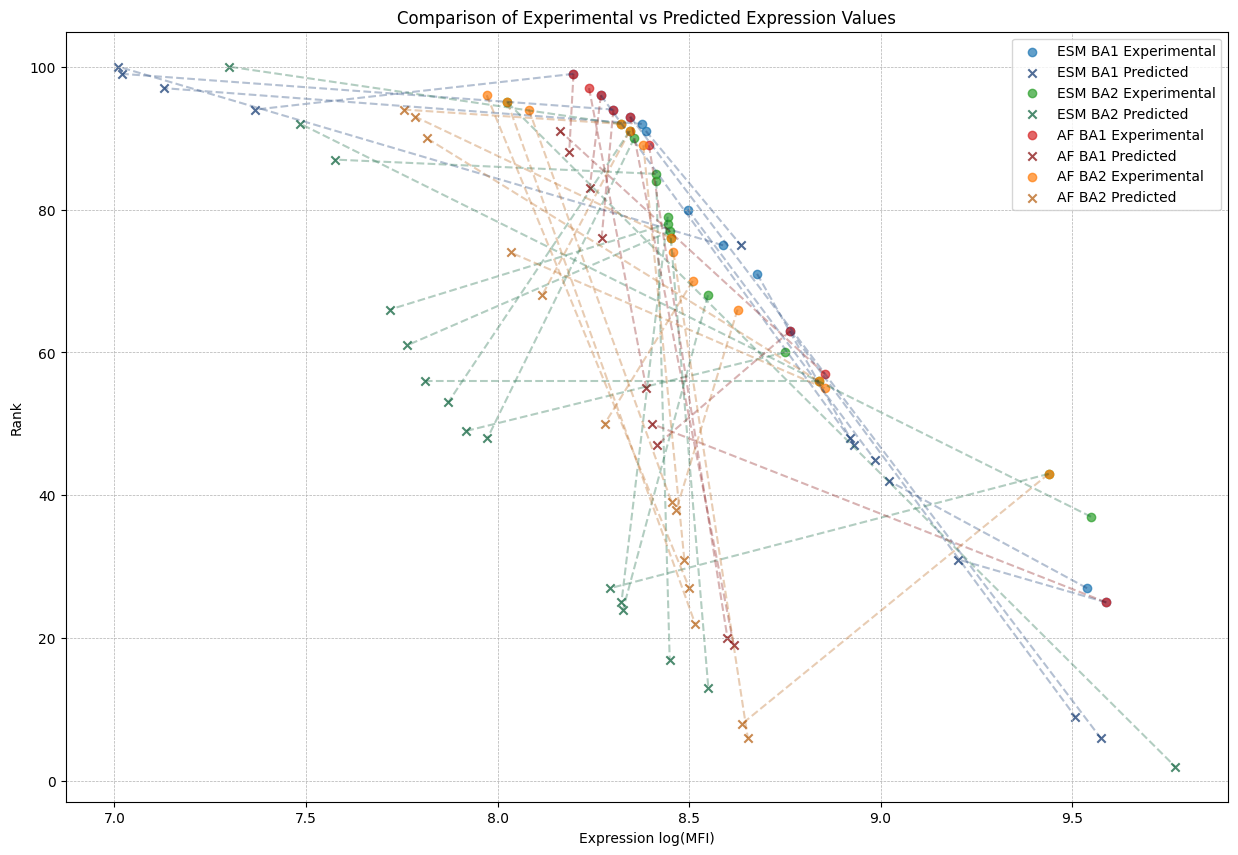

In [13]:
# Define colors for each method with 'normal' and 'dark' variants
colors = {
    'method1': ('#1f77b4', '#08306b'),  # normal blue, dark blue
    'method2': ('#2ca02c', '#005a32'),  # normal green, dark green
    'method3': ('#d62728', '#7f0000'),  # normal red, dark red
    'method4': ('#ff7f0e', '#b35806')   # normal orange, dark orange
}

# Setup the plot
plt.figure(figsize=(15, 10))

# Function to plot each method
def plot_method(df, color_scheme, method_name):
    exp_label = f'{method_name} Experimental'
    pred_label = f'{method_name} Predicted'
    plt.scatter(df['expr'], df['rank_expr'], marker='o', color=color_scheme[0], alpha=0.7, label=exp_label)
    plt.scatter(df['predicted_expr'], df['rank_predicted_expr'], marker='x', color=color_scheme[1], alpha=0.7, label=pred_label)
    for i in range(len(df)):
        plt.plot([df['expr'].iloc[i], df['predicted_expr'].iloc[i]], 
                 [df['rank_expr'].iloc[i], df['rank_predicted_expr'].iloc[i]], 
                 color=color_scheme[1], linestyle='--', alpha=0.3)  # Use the dark color for lines

# Plot each method
plot_method(df1, colors['method1'], 'ESM BA1')
plot_method(df2, colors['method2'], 'ESM BA2')
plot_method(df3, colors['method3'], 'AF BA1')
plot_method(df4, colors['method4'], 'AF BA2')

# Add titles and labels
plt.title('Comparison of Experimental vs Predicted Expression Values')
plt.xlabel('Expression log(MFI)')
plt.ylabel('Rank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

save_path = '/Users/maxvandenboom/stayahead/analysis/plots/predictions/extracted/train_1/rank_expr.png'
plt.savefig(save_path, format='png', dpi=300)
# Show the plot
plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot experimental data points
plt.scatter(df['bind'], df['rank_bind'], color='blue', alpha=0.5, label='Experimental')

# Plot predicted data points
plt.scatter(df['predicted_bind'], df['rank_predicted_bind'], color='red', alpha=0.5, label='Predicted')

# Adding titles and labels
plt.title('Experimental vs Predicted Data Points')
plt.xlabel('Bind')
plt.ylabel('Rank')
plt.legend()

# Add lines between experimental and predicted points
for i in range(len(df)):
    plt.plot([df['bind'].iloc[i], df['predicted_bind'].iloc[i]], 
             [df['rank_bind'].iloc[i], df['rank_predicted_bind'].iloc[i]], 
             'gray', linestyle='--', alpha=0.5)  # Using gray and dashed lines for clarity

# Show the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
